<h1  style = "font-size:60px;background-color: Blue ; color : Orange; text-align: center; border-radius: 100px 100px;">LOGISTIC REGRESSION</h1>

![Logistic Regression](https://miro.medium.com/max/1400/1*44qV8LhNzE5hPnta2PaaHw.png)

**A classifier is an estimator that assigns a class label to the input data point. Logistic Regression is a linear classifier that gives out the probability of a data point belonging to a particular class & the data point is assigned a class label based on that probability value. 
Also try to print out each step as it will make you understand better on what is going on.**

<h3 style= "font-family: cursive;font-size: 50px;background-color: #D3D3D3; ;text-align:center;color:#800080;border-radius: 200px 200px;">Importing Libraries 📖  </h3>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

<h3 style= "font-family: cursive;font-size: 50px;background-color: #D3D3D3; ;text-align:center;color:#800080;border-radius: 200px 200px;">CREATE DATASET 📈 </h3>

In [34]:
# 1. Create Dataset
X, y = make_blobs(n_samples = 1000, n_features = 2, centers=2, random_state=0) # basically you can make your regression/classification dataset through such methods. It is one of them 
dataset_array = np.concatenate((X, y.reshape(-1,1)), axis=1)

# 2. Create a Dataframe of the array
dataset_df = pd.DataFrame(dataset_array, columns = ['Col 1', 'Col 2', 'Target'])
dataset_df
X


array([[0.4666179 , 3.86571303],
       [2.84382807, 3.32650945],
       [0.61121486, 2.51245978],
       ...,
       [2.08302965, 0.47212145],
       [1.44193252, 2.76754364],
       [1.47001186, 4.18768339]])

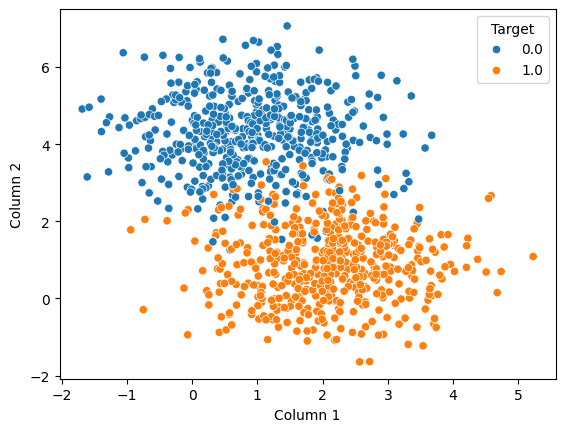

In [35]:
sns.scatterplot(data=dataset_df, x='Col 1', y='Col 2', hue='Target')
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.show()

<h3 style= "font-family: cursive;font-size: 50px;background-color: #D3D3D3; ;text-align:center;color:#800080;border-radius: 200px 200px;">FUNCTIONS FOR LOGISTIC REGRESSION </h3>

In [36]:
# Build a logistic regression classifier

# 0. Helper function: Sigmoid
def sigmoid(x):
    
    '''
    sigmoid(x) = 1 / (1 + e^(-x))
    '''
    return 1 / (1 + np.exp(-x))

# 1. Hypothesis
def hypothesis(x, theta):
    
    # h(x) = sigmoid(X.theta)
    z = np.dot(X, theta) 
    
    return sigmoid(z)

# 2. Loss Function: Binary Cross Entropy
# to get better idea try to print all of these by adding print statement in the function itself
def binary_cross_entropy(x, y, theta): # Usually we consider binary_cross_entropy as loss function(NOT ALWAYS) for binary classification
    
    m, n = x.shape 
    # print(x.shape)
    # a. Compute the hypothesis
    y_hat = hypothesis(x, theta)
    # print(y_hat)
    # b. Compute the Binary Cross Entropy
    loss = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    # print(np.log(y_hat))
    
    # print(np.log(1 - y_hat))
    # print( np.mean(loss) )
    return - np.mean(loss) 

# 3. Compute the gradient
def gradient(x, y, theta):
    
    # Compute hypothesis
    y_hat = hypothesis(x, theta)
    
    # Compute gradient
    grad = np.dot( x.T, (y - y_hat))
    
    return - grad / x.shape[0] 

# 4. Gradient Descent
def gradient_descent(x, y, n_iter = 100, alpha = 0.1): # Try to mingle with n_iter and alpha to see what happens when you change them
    
    # a. Randomly initialise theta
    m,n = x.shape
    theta = np.zeros(shape = (n, ))
    
    # List to store the error
    error = []
    
    # b. Perform the gradient descent
    for i in range(n_iter):
        '''
        y_hat = hypothesis(x, theta)
        print(y_hat, y_hat.shape)
        '''
        
        # b.1. Compute the loss
        loss = binary_cross_entropy(x, y, theta)
        error.append(loss)
        
        # b.2. Compute Gradient
        grad = gradient(x, y, theta)
        
        # b.3. Perform the update rule
        theta = theta - alpha * grad
        
    return theta, error

In [37]:
# 1. Add constant
dataset_df_copy = dataset_df.copy() 
dataset_df_copy.insert(0, 'Constant', np.ones(shape=(dataset_df_copy.shape[0], 1)))
dataset_df_copy

,Constant,Col 1,Col 2,Target
0,1.0,0.466618,3.865713,0.0
1,1.0,2.843828,3.326509,0.0
2,1.0,0.611215,2.512460,0.0
3,1.0,3.816534,1.651759,1.0
4,1.0,1.280972,0.628274,1.0
...,...,...,...,...
995,1.0,2.168005,1.554931,1.0
996,1.0,1.171340,2.522224,0.0
997,1.0,2.083030,0.472121,1.0
998,1.0,1.441933,2.767544,0.0


In [38]:
X = dataset_df_copy.drop('Target', axis=1)
y = dataset_df_copy['Target']

theta, error = gradient_descent(X, y, 20000,0.01)

In [39]:
print(theta)
print('*************************')
print(error[-1]) # last error

[ 3.71361777  1.14726533 -2.15910189]
*************************
0.11797155045820301


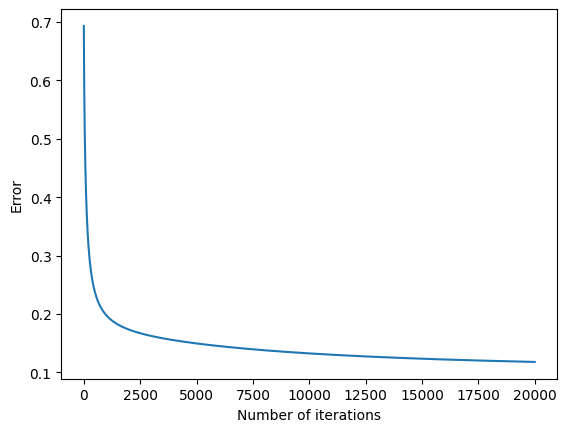

In [40]:
plt.plot(error)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

<h3 style= "font-family: cursive;font-size: 50px;background-color: #D3D3D3; ;text-align:center;color:#800080;border-radius: 200px 200px;">PLOTTING DATASET </h3>

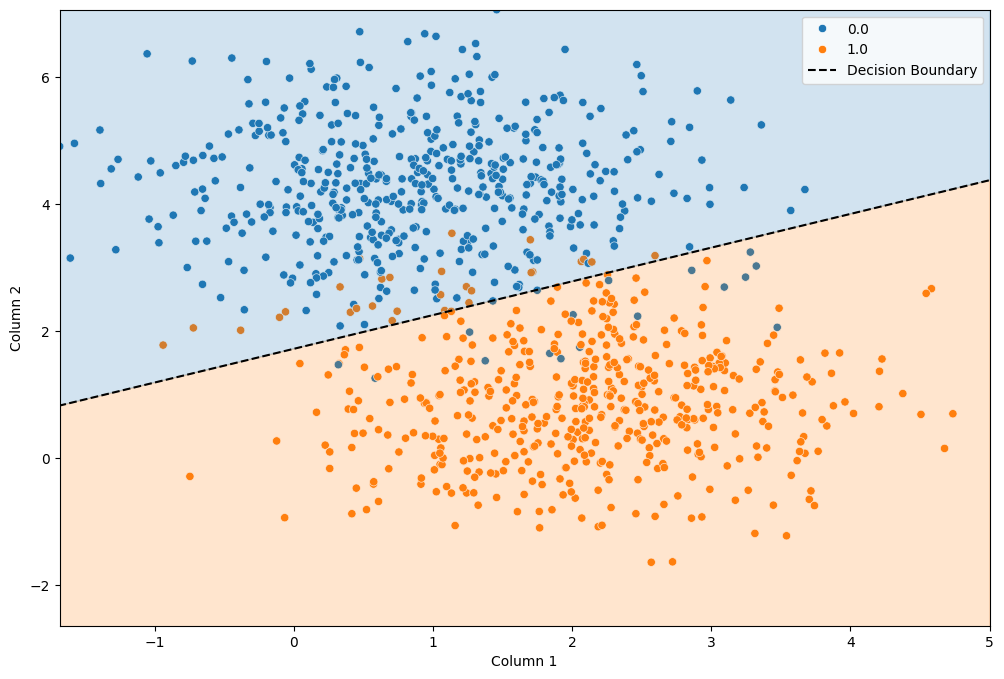

In [41]:
# plot the dataset along with the deicision boundary


# Create Decision Boundary
x2_max, x2_min = X['Col 2'].max(), X['Col 2'].min()
x1_max, x1_min = X['Col 1'].max(), X['Col 1'].min()

x_vals = np.array([-2, 5])
slope = - theta[1] / theta[2]
intercept = - theta[0] / theta[2]
decision_boundary = slope * x_vals + intercept

# Plot the dataset with decision bounddart
plt.figure(figsize=(12,8))
sns.scatterplot(data=dataset_df, x='Col 1', y='Col 2', hue='Target')
plt.plot(x_vals, decision_boundary, linestyle='--', color='black', label='Decision Boundary')
plt.fill_between(x_vals, decision_boundary, x2_min-10, color='tab:orange', alpha=0.2)
plt.fill_between(x_vals, decision_boundary, x2_max+10, color='tab:blue', alpha=0.2)
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.ylim(x2_min-1, x2_max)
plt.xlim(x1_min, 5)
plt.legend(loc='best')
plt.show()

# Comparing the results with Scikit Learn's Logistic Regression

In [42]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression

# Build the model
lr = LogisticRegression()
lr.fit(X.drop('Constant', axis=1), y)

# Compute coeffecients
theta_sklearn = lr.coef_
intercept_sklearn = lr.intercept_

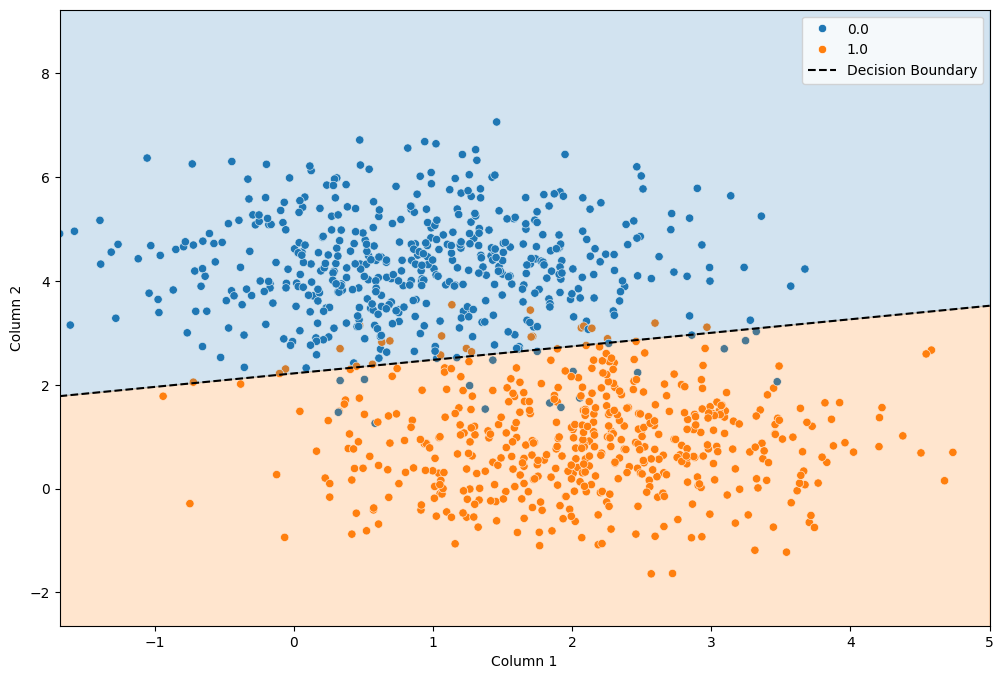

In [43]:
# Plot the Decision Boundary
# plot the dataset along with the deicision boundary

# Create Decision Boundary
x2_max, x2_min = X['Col 2'].max(), X['Col 2'].min()
x1_max, x1_min = X['Col 1'].max(), X['Col 1'].min()

x_vals = np.array([-2, 5])
slope = - theta_sklearn[0][0] / theta_sklearn[0][1]
intercept = - intercept_sklearn / theta_sklearn[0][1]
decision_boundary = slope * x_vals + intercept

# Plot the dataset with decision bounddart
plt.figure(figsize=(12,8))
sns.scatterplot(data=dataset_df, x='Col 1', y='Col 2', hue='Target')
plt.plot(x_vals, decision_boundary, linestyle='--', color='black', label='Decision Boundary')
plt.fill_between(x_vals, decision_boundary, x2_min-10, color='tab:orange', alpha=0.2)
plt.fill_between(x_vals, decision_boundary, x2_max+10, color='tab:blue', alpha=0.2)
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.ylim(x2_min-1, x1_max+4)
plt.xlim(x1_min, 5)
plt.legend(loc='best')
plt.show()

In [44]:
# Print the Custom Logisit Regression's results
print("Weights of variable given out by custom Logistic Regression")
print("Col 1: {}".format(theta[1]))
print("Col 2: {}".format(theta[2]))
print("Intercept : {}".format(theta[0]))
print()

print("Weights of variable given out by Sklearn's Logistic Regression")
print("Col 1: {}".format(theta_sklearn[0][0]))
print("Col 2: {}".format(theta_sklearn[0][1]))
print("Intercept : {}".format(intercept_sklearn[0]))


Weights of variable given out by custom Logistic Regression
Col 1: 1.1472653302670168
Col 2: -2.159101887139582
Intercept : 3.713617769374238

Weights of variable given out by Sklearn's Logistic Regression
Col 1: 0.7795772636432459
Col 2: -2.9905889176699776
Intercept : 6.635722330554089


In [45]:
# Compute accuracy for both the models

# 1. Custom Logistic Regression
predictions_1 = np.round(hypothesis(X.drop('Constant', axis=1), theta))
acc1 = np.sum(predictions_1 == y) / len(y) * 100

# 2. Sklearn's Logistic Regression
predictions_2 = lr.predict(X.drop('Constant', axis=1))
acc2 = np.sum(predictions_2 == y) / len(y) * 100

print("Accuracy of custom Logistic Regression Classifier: {}%".format(acc1))
print("Accuracy of sklearn's Logistic Regression Classifier: {}%".format(acc2))

Accuracy of custom Logistic Regression Classifier: 95.39999999999999%
Accuracy of sklearn's Logistic Regression Classifier: 95.7%


# Try changing learning rate and num of iterations. Try taking learning rate very high and then very low(Dont take it -ve :). Also Check Scikit learn library and get familiar with it..it will come very handy in the future.